<a href="https://colab.research.google.com/github/git-cat-meow/study/blob/master/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# https://pythondatascience.plavox.info/scikit-learn/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0

import pandas as pd
import numpy as np
 
wine = pd.read_csv("/content/drive/My Drive/Colab Notebooks/winequality-red.csv", sep=";")
wine.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.3

## 単回帰分析

In [18]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# 説明変数に "density (濃度)" を利用
# clfに渡すため、データフレームをarrayに変換する
X = wine.loc[:, ['density']].values
 
# 目的変数に "alcohol (アルコール度数)" を利用
Y = wine['alcohol'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 回帰係数
print(clf.coef_)
 
# 切片 (誤差)
print(clf.intercept_)
 
# 決定係数
print(clf.score(X, Y))

# 得られた回帰式
# [alcohol] = -280.16382307 × [density] + 289.675343383

[-280.16382307]
289.67534338256456
0.2461943643971065
0.2461943643971065


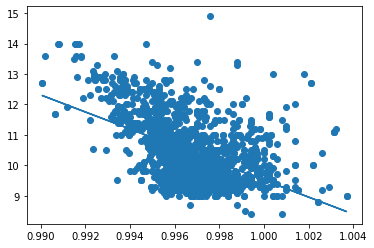

In [7]:
import matplotlib.pyplot as plt
 
# 散布図
plt.scatter(X, Y)
 
# 回帰直線
plt.plot(X, clf.predict(X))


## 重回帰分析

In [17]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# 説明変数に "quality (品質スコア以外すべて)" を利用
wine_except_quality = wine.drop("quality", axis=1)
X = wine_except_quality.values
 
# 目的変数に "quality (品質スコア)" を利用
Y = wine['quality'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine_except_quality.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

# 決定係数
print(clf.score(X,Y))

# 得られた回帰式
# [quality] = -17.881164 × [density] + -1.874225 × [chlorides] +
#             -1.083590 × [volatile acidity] + -0.413653 × [pH] + 
#             -0.182564 × [citric acid] + -0.003265 × [total sulfur dioxide] + 
#             0.004361 × [free sulfur dioxide] + 0.016331 × [residual sugar] + 
#             0.024991 × [fixed acidity] + 0.276198 × [alcohol] + 
#             0.916334 × [sulphates] + 21.9652084495

                    Name  Coefficients
7                density    -17.881164
4              chlorides     -1.874225
1       volatile acidity     -1.083590
8                     pH     -0.413653
2            citric acid     -0.182564
6   total sulfur dioxide     -0.003265
5    free sulfur dioxide      0.004361
3         residual sugar      0.016331
0          fixed acidity      0.024991
10               alcohol      0.276198
9              sulphates      0.916334
21.965208449451815
0.36055170303868833


## 重回帰分析（正規化あり）

In [19]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# データフレームの各列を正規化
wine2 = wine.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()
 
# 説明変数に "quality (品質スコア以外すべて)" を利用
wine2_except_quality = wine2.drop("quality", axis=1)
X = wine2_except_quality.values
 
# 目的変数に "quality (品質スコア)" を利用
Y = wine2['quality'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine2_except_quality.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

# 決定係数
print(clf.score(X,Y))

                    Name  Coefficients
2            citric acid      0.036513
3         residual sugar      0.047687
7                density      0.048708
0          fixed acidity      0.056479
5    free sulfur dioxide      0.061931
8                     pH      0.105068
6   total sulfur dioxide      0.184775
4              chlorides      0.224532
9              sulphates      0.306056
1       volatile acidity      0.316408
10               alcohol      0.359057
1.2701558656451015e-15
0.3605517030386882


## 回帰式の評価

In [14]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred) 

NameError: ignored